In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import svm

C:\Users\antri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
LoanData1 = pd.read_csv('LoanClassificationdataset.csv',index_col=None)

In [3]:
LoanData1.dtypes

Amount Requested        float64
Debt-To-Income Ratio    float64
Risk_Score              float64
State                    object
emp_length                int64
grade_new                object
loan_status               int64
dtype: object

In [4]:
LD.dtypes

NameError: name 'LD' is not defined

In [4]:
LD = LoanData1

In [5]:
LD = LD.convert_objects(convert_numeric=True)

C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [6]:
pd.isnull(LD).sum() > 0

Amount Requested        False
Debt-To-Income Ratio    False
Risk_Score              False
State                   False
emp_length              False
grade_new               False
loan_status             False
dtype: bool

In [75]:
LD['loan_status'].unique()

array([1, 0], dtype=int64)

In [7]:
LD['State1'] = pd.Categorical.from_array(LD.State).labels

C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  if __name__ == '__main__':
C:\Users\antri\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  if __name__ == '__main__':


In [99]:
LD['State'] = LD['State'].astype('category')

In [34]:
LD['grade_new_num'] = LD['grade_new'].map({'A': 1, 'B': 2, 'C': 3, 'D':4, 'E': 5, 'F': 6, 'G': 7, 'H': 8})


LD['grade_new_num']=pd.to_numeric(LD['grade_new_num'], errors='ignore')


In [56]:
LD.head(5)

,Amount Requested,Debt-To-Income Ratio,Risk_Score,State,emp_length,grade_new,loan_status,State1,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,grade_H,grade_new_num
0,12000.0,13.0,717.0,CO,10,B,1,5,1,0,0,0,0,0,0,2
1,11100.0,3.0,692.0,NY,10,C,1,34,0,1,0,0,0,0,0,3
2,9750.0,25.0,672.0,CA,1,F,1,4,0,0,0,0,1,0,0,6
3,12000.0,16.0,662.0,NM,10,G,1,32,0,0,0,0,0,1,0,7
4,8000.0,15.0,687.0,CO,2,C,0,5,0,1,0,0,0,0,0,3


In [8]:
grade_dum = pd.DataFrame()
grade_dum['grade'] = LD.grade_new
# create dummy variables
grade_dummuies = pd.get_dummies(grade_dum.grade, prefix='grade')

grade_dummuies.drop(grade_dummuies.columns[0], axis=1, inplace=True)
grade_dummuies.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,grade_H
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0


In [9]:
LD = pd.concat([LD,grade_dummuies], axis=1)
LD.head(2)

,Amount Requested,Debt-To-Income Ratio,Risk_Score,State,emp_length,grade_new,loan_status,State1,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,grade_H
0,12000.0,13.0,717.0,CO,10,B,1,5,1,0,0,0,0,0,0
1,11100.0,3.0,692.0,NY,10,C,1,34,0,1,0,0,0,0,0


In [142]:
LD.head(2)

,Amount Requested,Debt-To-Income Ratio,Risk_Score,State,emp_length,grade_new,loan_status,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,grade_H,State1
0,12000.0,13.0,717.0,CO,10,B,1,1,0,0,0,0,0,0,5
1,11100.0,3.0,692.0,NY,10,C,1,0,1,0,0,0,0,0,34


In [144]:
LD['State1'].unique()

array([ 5, 34,  4, 32, 22, 19, 43,  6, 27,  9, 31, 40,  8, 17, 35, 15,  3,
       38, 44, 10, 48, 14, 24, 20, 45, 23, 47, 50, 42, 30, 33, 16, 39,  1,
       37, 49, 18,  2, 46, 36, 26, 11, 41,  0,  7, 29, 12, 25, 13, 21, 28], dtype=int64)

In [10]:
LD.to_csv('AzzureClassification.csv', index = None)

In [38]:
y =LD['loan_status']
colsToKeep = ['State1','Amount Requested','Debt-To-Income Ratio','emp_length','grade_new_num']
#'LOAN_AGE','REMAINING_MONTHS_TO_LEGAL_MATURITY','CURRENT_INTEREST_RATE','CURRENT_DEFERRED_UPB','CURRENT_ACTUAL_UPB']
#'REMAINING_MONTHS_TO_LEGAL_MATURITY,'NET_SALES_PROCEEDS','NON_MI_RECOVERIES','Actual_Loss_Calculation'
X = LD[colsToKeep]

y = np.ravel(y)



In [37]:
Xtrain, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [165]:
model = LogisticRegression()
mod_fit = model.fit(Xtrain,y_train)

In [166]:
print(model.score(Xtrain,y_train))

0.893892729516


In [167]:
pred = mod_fit.predict(X_test)
pred
print (len(pred))
print (len(y_test))

1762237
1762237


In [168]:
metrics.accuracy_score(y_test,pred)

0.89377535484727655

In [169]:
print (metrics.confusion_matrix(y_test,pred))

[[1324930   81099]
 [ 106094  250114]]


In [170]:
pd.crosstab(pred, y_test,rownames=['pred'],colnames=['ytest'])

ytest,0,1
pred,,
0,1324930,106094
1,81099,250114


In [171]:
model.coef_

array([[  7.74407492e-04,  -2.01924331e-05,  -2.28488594e-02,
         -1.29851415e-04,   2.37491688e-01,   6.98332915e-01,
          6.26114731e-01,   3.79107766e-01,  -2.04304158e-01,
          5.40376046e-01,   2.48101772e-01,  -3.81765570e+00]])

In [172]:
logit = sm.Logit(LD['loan_status'], LD[colsToKeep])
reges_mod = logit.fit()
print(reges_mod.summary())

C:\Users\antri\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1213: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: 0.199345
         Iterations: 35


C:\Users\antri\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:              5874123
Model:                          Logit   Df Residuals:                  5874111
Method:                           MLE   Df Model:                           11
Date:                Wed, 12 Apr 2017   Pseudo R-squ.:                  0.6039
Time:                        19:35:12   Log-Likelihood:            -1.1710e+06
converged:                      False   LL-Null:                   -2.9560e+06
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
State1                   0.0035      0.000     33.230      0.000         0.003     0.004
Amount Requested       -2.5e-05   1.69e-07   -148.159      0.000     -2.53e-05 -2.47e-05
Debt-To-Inco

# with EXPENSES the curve is on the diagonal, 

good set.. ROC is good
'LOAN_AGE','REMAINING_MONTHS_TO_LEGAL_MATURITY','CURRENT_INTEREST_RATE',
             'CURRENT_DEFERRED_UPB','NET_SALES_PROCEEDS','NON_MI_RECOVERIES']

### ROC 

In [173]:
preds = model.predict_proba(X_test)[:,1]
fpr,tpr, _ = roc_curve(y_test,preds)


C:\Users\antri\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


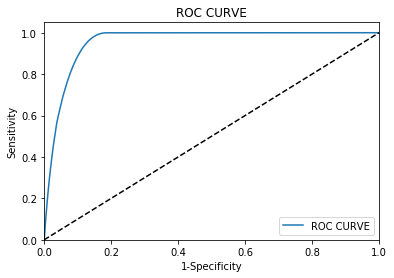

In [174]:
import matplotlib.pylab as plt

plt.figure()
plt.plot(fpr,tpr,label= "ROC CURVE")
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#### SVM

In [417]:
y =QD['Deliquent']
colsToKeep = ['LOAN_AGE','ZERO_BALANCE_CODE','REPURCHASE_FLAG','MODIFICATION_FLAG','CURRENT_INTEREST_RATE',
             'CURRENT_DEFERRED_UPB']
#'LOAN_AGE','REMAINING_MONTHS_TO_LEGAL_MATURITY','CURRENT_INTEREST_RATE','CURRENT_DEFERRED_UPB','CURRENT_ACTUAL_UPB']
#'REMAINING_MONTHS_TO_LEGAL_MATURITY,'NET_SALES_PROCEEDS','NON_MI_RECOVERIES','Actual_Loss_Calculation'
X = QD[colsToKeep]

#y = np.ravel(y)

Xtrain, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [49]:
ax = Xtrain
ay = y_train

In [50]:
y_train.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(ax,ay)

In [ ]:
pred = clf.predict(X_test)
pred

In [ ]:
pd.crosstab(pred, y_test,rownames=['pred'],colnames=['ytest'])

Random Forest

In [39]:
from sklearn.cross_validation  import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import svm

In [48]:
clf = RandomForestClassifier(n_estimators=12,verbose =1,min_samples_split=2)
clf = clf.fit(Xtrain, y_train)

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.3min finished


In [49]:
scores = cross_val_score(clf, X_test, y_test)

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   32.2s finished
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   30.6s finished
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   31.9s finished
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    2.0s finished


In [50]:
scores.mean() 

0.93760260441895893

In [51]:
pred = clf.predict(X_test)

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    8.2s finished


In [52]:
metrics.accuracy_score(y_test,pred)

0.94439907912499854

In [53]:
pd.crosstab(pred, y_test,rownames=['pred'],colnames=['ytest'])

ytest,0,1
pred,,
0,1341697,33650
1,64332,322558


In [54]:
preds = clf.predict_proba(X_test)[:,1]
fpr,tpr, _ = roc_curve(y_test,preds)

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    7.6s finished


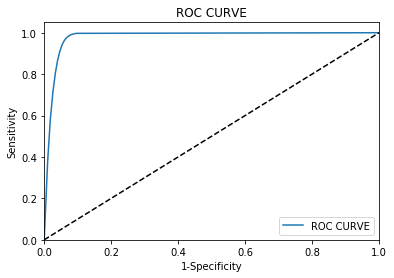

In [55]:
import matplotlib.pylab as plt

plt.figure()
plt.plot(fpr,tpr,label= "ROC CURVE")
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Neural Networks

In [13]:
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pylab as plt
from sklearn import metrics
from sklearn import svm

In [42]:
clf = MLPClassifier(solver='adam',hidden_layer_sizes=(6, 2))

In [43]:
clf = clf.fit(Xtrain, y_train)

C:\Users\antri\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [27]:
from sklearn.cross_validation  import cross_val_score
#from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

In [44]:
scores = cross_val_score(clf, X_test, y_test)

In [36]:
scores.mean() 

0.83672509559247421

In [46]:
pred = clf.predict(X_test)

C:\Users\antri\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:612: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)


In [38]:
metrics.accuracy_score(y_test,pred)

0.92175002567759046

In [39]:
pd.crosstab(pred, y_test,rownames=['pred'],colnames=['ytest'])

ytest,0,1
pred,,
0,1298605,30471
1,107424,325737


In [40]:
preds = clf.predict_proba(X_test)[:,1]
fpr,tpr, _ = roc_curve(y_test,preds)

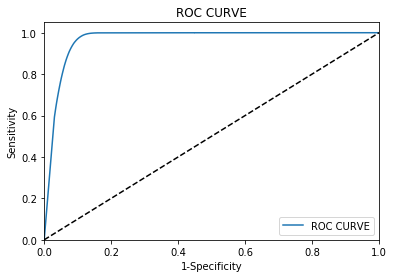

In [41]:
import matplotlib.pylab as plt

plt.figure()
plt.plot(fpr,tpr,label= "ROC CURVE")
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()